# 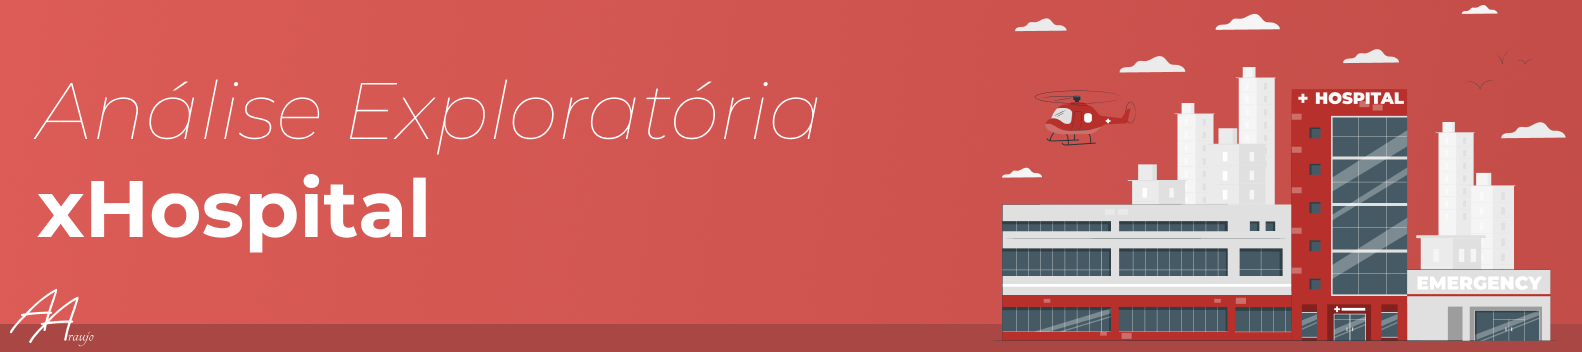  

# Exploração de dados xHospital

Trata-se de uma base de dados hospitalar contendo informações sobre as classes dos procedimentos, tipo de convênio, nome dos médicos,  informações de pacientes (admissão, alta, gênero, data de nascimento..), além de outras informações como financeiras, acomodações e afins.

O objetivo desta exploração de dados é responder as perguntas de negócios abaixo para posteriormente criar os painéis de visualizações.

<span style="font-size: 14px;">1. Quais as classes de procedimentos que mais realizamos na unidade?</span>

<span style="font-size: 14px;">2. Quais convênios nos geram maior faturamento?</span>

<span style="font-size: 14px;">3. Qual a taxa de mortalidade?</span>

<span style="font-size: 14px;">4. Qual é o TMP (Tempo Médio de Permanência) dos pacientes?</span>

<span style="font-size: 14px;">5. Qual o número de Admissões?</span>

<span style="font-size: 14px;">6. Qual o número de Altas?</span>

<span style="font-size: 14px;">7. Qual a distribuição de admissões por gênero?</span>

<span style="font-size: 14px;">8. Qual os três médicos com maior número de pacientes atendidos?</span>

<span style="font-size: 14px;">9. Qual os três médicos com maior número de faturamento?</span>

<span style="font-size: 14px;">10. Qual a idade máxima, mínima, média e desvio dos pacientes?</span>

<span style="font-size: 14px;">11. Qual a frequência absoluta e relativa por idade dos pacientes?</span>

<span style="font-size: 14px;">12. Qual os quartis da distribuição das idades e limites superiores e inferiores de outliers?</span>

<span style="font-size: 14px;">13. Faixa etária com maior faturamento (dividir em 5 grupos)</span>

<span style="font-size: 14px;">14. Frequência absoluta e relativa das acomodações por quantidade de pacientes?</span>

<span style="font-size: 14px;">15. Percentual de altas por gênero</span>

<span style="color: var(--vscode-foreground);">Embora o Azure Data Studio gere automaticamente gráficos nos outputs, a ideia desta exploração é apenas responder as questões mencionadas.</span>

<span style="color: var(--vscode-foreground);"><b>Créditos da base de dados:</b> Xperium Treinamentos</span>

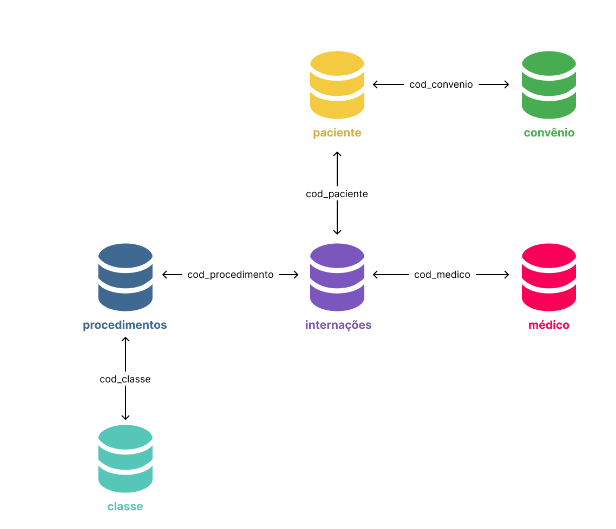

In [14]:
-- Quais as classes de procedimentos que mais realizamos na unidade?
SELECT TOP(5)
    tab_classe_procedimento.classe,
    COUNT(*) AS Total
FROM tab_internacoes
INNER JOIN tab_procedimento
ON tab_internacoes.cod_procedimento = tab_procedimento.cod_procedimento
INNER JOIN tab_classe_procedimento
ON tab_procedimento.cod_classe = tab_classe_procedimento.cod_classe
GROUP BY tab_classe_procedimento.classe
ORDER BY Total DESC

(5 rows affected)

Total execution time: 00:00:00.026

classe,Total
Classe 19,801
Classe 1,540
Classe 24,305
Classe 10,296
Classe 25,276


In [36]:
-- Quais convênios nos geram maior faturamento?
WITH Tab AS (
SELECT 
    tab_convenio.convenio,
    SUM(tab_internacoes.valor) AS Total
FROM tab_convenio
INNER JOIN tab_paciente
ON tab_convenio.cod_convenio = tab_paciente.cod_convenio
INNER JOIN tab_internacoes
ON tab_paciente.cod_paciente = tab_paciente.cod_paciente
GROUP BY tab_convenio.convenio
)
SELECT TOP(5)
    convenio,
    Total,
    FORMAT(Total/SUM(Total)OVER(),'0.00%') AS Percentual
FROM Tab
ORDER BY Total DESC

(5 rows affected)

Total execution time: 00:00:00.021

convenio,Total,Percentual
Plano Bem-Estar,4756431046680,"20,08%"
Plano Vida Nova,4606691550766,"19,45%"
Saúde+,3241419676256,"13,69%"
Vitalícia Saúde,3144529414194,"13,28%"
Saúde Premier,1981846269450,"8,37%"


In [50]:
-- Qual a taxa de mortalidade?
DECLARE @total INT = (SELECT COUNT(*) FROM tab_internacoes)

SELECT
    FORMAT(1.0 * COUNT(*)/@total,'0.00%') AS Taxa_mortalidade
FROM tab_internacoes
WHERE tipo_alta = 'Obito'


(1 row affected)

Total execution time: 00:00:00.007

Taxa_mortalidade
"3,84%"


In [91]:
-- Qual é o TMP (Tempo Médio de Permanência) dos pacientes?
WITH tmp AS(
SELECT 
    CAST(LEFT(RIGHT(data_admissao,16),8) AS TIME) AS Horario_admissao,
    CAST(LEFT(RIGHT(data_alta,16),8) AS TIME) AS Horario_alta
FROM tab_internacoes
)
SELECT
    AVG(DATEDIFF(MINUTE, Horario_admissao, Horario_alta)) AS tmp
FROM tmp

Aviso: o valor nulo é eliminado por uma agregação ou outra operação SET.

(1 row affected)

Total execution time: 00:00:00.016

tmp
295


In [94]:
-- Qual o número de Admissões?
SELECT
    COUNT(data_admissao) AS Total_admissões
FROM tab_internacoes

(1 row affected)

Total execution time: 00:00:00.011

Total_admissões
3461


In [96]:
-- Qual o número de Altas?
SELECT 
    COUNT(data_alta) AS Total_alta
FROM tab_internacoes

Aviso: o valor nulo é eliminado por uma agregação ou outra operação SET.

(1 row affected)

Total execution time: 00:00:00.007

Total_alta
3449


In [104]:
-- Qual a distribuição percentual de admissões por gênero?
SELECT
    genero_paciente,
    COUNT(*) AS Total,
    FORMAT(1.0 * COUNT(*)/SUM(count(*))OVER(),'0.00%') AS Percentual
FROM tab_paciente
GROUP BY genero_paciente

(2 rows affected)

Total execution time: 00:00:00.019

genero_paciente,Total,Percentual
F,1528,"56,82%"
M,1161,"43,18%"


In [111]:
-- Qual os três médicos com maior número de pacientes atendidos?
SELECT top(5)
    med.medico,
    COUNT(inter.data_admissao) AS Total,
    FORMAT(1.0 * COUNT(inter.data_admissao)/SUM(COUNT(inter.data_admissao))OVER(),'0.00%') AS Percentual
FROM tab_medicos AS med
INNER JOIN tab_internacoes AS inter
ON med.cod_medico = inter.cod_medico
GROUP BY med.medico
ORDER BY Total DESC

(5 rows affected)

Total execution time: 00:00:00.023

medico,Total,Percentual
Juliana Oliveira,540,"15,60%"
Sofia Ferreira,280,"8,09%"
Laura Martins,200,"5,78%"
Bianca Almeida,185,"5,35%"
Lucas Oliveira,165,"4,77%"


In [118]:
-- Qual os três médicos com maior número de faturamento?
SELECT top(5)
    med.medico,
    COUNT(inter.data_admissao) AS Total,
    SUM(inter.valor) AS Faturamento,
    FORMAT(1.0 * SUM(inter.valor)/SUM(SUM(inter.valor))OVER(),'0.00%') AS Percentual
FROM tab_medicos AS med
INNER JOIN tab_internacoes AS inter
ON med.cod_medico = inter.cod_medico
GROUP BY med.medico
ORDER BY Faturamento DESC


(5 rows affected)

Total execution time: 00:00:00.014

medico,Total,Faturamento,Percentual
Alice Almeida,86,5793389929,"65,77%"
Sofia Ferreira,280,1435100371,"16,29%"
Beatriz Martins,141,163165359,"1,85%"
Carolina Gonçalves,133,153015090,"1,74%"
Felipe Oliveira,102,141832291,"1,61%"


In [133]:
-- Qual a idade máxima, mínima, média e desvio dos pacientes?
WITH faixa AS (
SELECT 
    YEAR(GETDATE()) - YEAR(data_nasc_paciente) AS [Faixa Etária]
FROM tab_paciente
)

SELECT
    MAX([Faixa Etária]) AS [Idade Máxima],
    MIN([Faixa Etária]) AS [Idade Mínima],
    AVG([Faixa Etária]) AS [Média Idade],
    ROUND(STDEVP([Faixa Etária]),2) AS [Desvio Padrão]
FROM faixa


(1 row affected)

Total execution time: 00:00:00.019

Idade Máxima,Idade Mínima,Média Idade,Desvio Padrão
106,6,56,"17,63"


In [167]:
-- Qual a frequência absoluta e relativa por idade dos pacientes?
WITH faixa AS (
SELECT 
    YEAR(GETDATE()) - YEAR(data_nasc_paciente) AS [Faixa Etária]
FROM tab_paciente
)
SELECT TOP(5)
    [Faixa Etária],
    COUNT(*) AS [Freq absoluta],
    FORMAT(1.0 * COUNT(*)/SUM(COUNT(*))OVER(),'0.00%') AS [Freq Relativa]
FROM faixa
GROUP BY [Faixa Etária]
ORDER BY [Faixa Etária] ASC


(5 rows affected)

Total execution time: 00:00:00.022

Faixa Etária,Freq absoluta,Freq Relativa
6,2,"0,07%"
9,2,"0,07%"
10,3,"0,11%"
11,2,"0,07%"
13,2,"0,07%"


In [160]:
-- Qual os quartis da distribuição das idades e limites superiores e inferiores de outliers?
WITH faixa AS (
SELECT 
    YEAR(GETDATE()) - YEAR(data_nasc_paciente) AS [Faixa Etária]
FROM tab_paciente
),
quartis AS(
SELECT DISTINCT
    PERCENTILE_CONT(0.25) WITHIN GROUP(ORDER BY [Faixa Etária])OVER() AS Q1,
    PERCENTILE_CONT(0.50) WITHIN GROUP(ORDER BY [Faixa Etária])OVER() AS Q2,
    PERCENTILE_CONT(0.75) WITHIN GROUP(ORDER BY [Faixa Etária])OVER() AS Q3
FROM faixa
)
SELECT 
    *,
    Q3-Q1 AS IQR,
    Q1 + 1.5 * (Q3-Q1) AS [Limite Inferior],
    Q3 + 1.5 * (Q3-Q1) AS [Limite Superior]
FROM quartis

(1 row affected)

Total execution time: 00:00:00.065

Q1,Q2,Q3,IQR,Limite Inferior,Limite Superior
43,58,70,27,"83,5","110,5"


In [187]:
-- Faixa etária com maior faturamento (dividir em 5 grupos)
WITH faixa AS (
SELECT 
    YEAR(GETDATE()) - YEAR(data_nasc_paciente) AS [Faixa Etária]
FROM tab_paciente
),
faixa_idade  AS(
SELECT
    CASE 
    WHEN [Faixa Etária] < 20 THEN '1-20'
    WHEN [Faixa Etária] >= 20 AND [Faixa Etária] < 40 THEN '20-40'
    WHEN [Faixa Etária] >= 40 AND [Faixa Etária] < 60 THEN '40-60'
    WHEN [Faixa Etária] >= 60 AND [Faixa Etária] < 80 THEN '60-80'
    ELSE '80-106'
    END AS Idade
FROM faixa
)
SELECT
    Idade,
    COUNT(*) AS [Freq absoluta],
    FORMAT(1.0 * COUNT(*)/SUM(COUNT(*))OVER(), '0.00%') AS [Freq Relativa]
FROM faixa_idade
GROUP BY Idade
ORDER BY [Freq absoluta] DESC

(5 rows affected)

Total execution time: 00:00:00.024

Idade,Freq absoluta,Freq Relativa
60-80,1054,"39,20%"
40-60,888,"33,02%"
20-40,465,"17,29%"
80-106,224,"8,33%"
1-20,58,"2,16%"


In [170]:
-- Frequência absoluta e relativa das acomodações por quantidade de pacientes?
SELECT
    acomodacao,
    COUNT(*) AS Total,
    FORMAT(1.0 * COUNT(*)/SUM(COUNT(*))OVER(), '0.00%') AS Percentual
FROM tab_internacoes
GROUP BY acomodacao
ORDER BY Total DESC

(3 rows affected)

Total execution time: 00:00:00.024

acomodacao,Total,Percentual
Apartamento,1980,"57,21%"
Enfermaria,1442,"41,66%"
UTI,39,"1,13%"


In [176]:
-- Percentual de altas por gênero
SELECT
    tipo_alta,
    tab_paciente.genero_paciente,
    COUNT(tipo_alta) AS Total,
    FORMAT(1.0 *COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY tab_internacoes.tipo_alta),'0.00%') AS Percentual    
FROM tab_internacoes
INNER JOIN tab_paciente
ON tab_internacoes.cod_paciente = tab_paciente.cod_paciente
GROUP BY tab_internacoes.tipo_alta, tab_paciente.genero_paciente
ORDER BY tab_internacoes.tipo_alta ASC, tab_paciente.genero_paciente ASC

(14 rows affected)

Total execution time: 00:00:00.027

tipo_alta,genero_paciente,Total,Percentual
A Pedido,F,3,"20,00%"
A Pedido,M,12,"80,00%"
Administrativo,F,1,"50,00%"
Administrativo,M,1,"50,00%"
Evasao,F,13,"56,52%"
Evasao,M,10,"43,48%"
Medica,F,1780,"54,62%"
Medica,M,1479,"45,38%"
Obito,F,58,"43,61%"
Obito,M,75,"56,39%"
